1. Cargamos las librerías necesarias

In [28]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

2. Cargar el archivo Excel con los datos

In [ ]:
# Intentamos cargar el archivo
df = pd.read_excel("TechnicalAssessment.xlsx")

# Vemos las primeras filas
print(df.head())

# Checamos cuántas columnas tiene
print("Número de columnas:", df.shape[1])

  id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0  70172,Male,Loyal Customer,13,Personal Travel,E...                                                                                                                                                                                                                                                                                                                                               
1  5047,Male,disloyal Customer,25,Business travel...                                                                                                                                                                            

3. Preprocesamiento del archivo

In [12]:
# Cargamos el archivo Excel sin encabezado
df_raw = pd.read_excel("TechnicalAssessment.xlsx", header=None)

# Mostramos las primeras filas para ver cómo están los datos
print(df_raw.head())

# Separamos los valores por coma (",") y expandimos en columnas
df_clean = df_raw[0].str.split(",", expand=True)

# La primera fila tiene los nombres de las columnas, la tomamos para los encabezados
df_clean.columns = df_clean.iloc[0]
df_clean = df_clean.drop(index=0).reset_index(drop=True)

# Mostramos las primeras filas ya con encabezados
print(df_clean.head())

# Verificamos el número de columnas después de la limpieza
print("Número de columnas:", df_clean.shape[1])

                                                   0
0  id,Gender,Customer Type,Age,Type of Travel,Cla...
1  70172,Male,Loyal Customer,13,Personal Travel,E...
2  5047,Male,disloyal Customer,25,Business travel...
3  110028,Female,Loyal Customer,26,Business trave...
4  24026,Female,Loyal Customer,25,Business travel...
0      id  Gender      Customer Type Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer  13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer  25  Business travel  Business   
2  110028  Female     Loyal Customer  26  Business travel  Business   
3   24026  Female     Loyal Customer  25  Business travel  Business   
4  119299    Male     Loyal Customer  61  Business travel  Business   

0 Flight Distance Inflight wifi service Departure/Arrival time convenient  \
0             460                     3                                 4   
1             235                     3                                 2   
2            1142       

4. Descripción general de los datos

In [13]:
# Descripción general de las variables
print(df_clean.describe(include='all'))

0           id  Gender   Customer Type     Age   Type of Travel     Class  \
count   129880  129880          129880  129880           129880    129880   
unique  129880       3               3      78                3         4   
top      70172  Female  Loyal Customer      39  Business travel  Business   
freq         1   65896          106097    3691            89692     62158   

0      Flight Distance Inflight wifi service  \
count           129880                129880   
unique            3827                     7   
top                337                     2   
freq               840                 32319   

0      Departure/Arrival time convenient Ease of Online booking  ...  \
count                             129880                 129880  ...   
unique                                 8                      7  ...   
top                                    4                      3  ...   
freq                               31879                  30390  ...   

0      Infli

5. Conversión de columnas numéricas

In [14]:
# Seleccionamos las columnas numéricas
cols_numericas = ['Age', 'Flight Distance', 'Inflight wifi service',
                  'Departure/Arrival time convenient', 'Ease of Online booking',
                  'Gate location', 'Food and drink', 'Online boarding',
                  'Seat comfort', 'Inflight entertainment', 'On-board service',
                  'Leg room service', 'Baggage handling', 'Checkin service',
                  'Inflight service', 'Cleanliness',
                  'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Convertimos estas columnas a formato numérico (forzamos con 'coerce' para valores no válidos)
df_clean[cols_numericas] = df_clean[cols_numericas].apply(pd.to_numeric, errors='coerce')

# Mostramos la cantidad de valores nulos en cada columna
print(df_clean.isnull().sum())

0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    1
Type of Travel                         0
Class                                  0
Flight Distance                       13
Inflight wifi service                  4
Departure/Arrival time convenient      6
Ease of Online booking                10
Gate location                         15
Food and drink                        10
Online boarding                       12
Seat comfort                           3
Inflight entertainment                 3
On-board service                       3
Leg room service                       2
Baggage handling                       6
Checkin service                        2
Inflight service                       5
Cleanliness                            1
Departure Delay in Minutes            15
Arrival Delay in Minutes             394
satisfaction                           0
dtype: int64


6. Verificación del tamaño del dataset

In [16]:
# Verificamos el número total de filas
print("Total de filas:", df_clean.shape[0])

Total de filas: 129880


7. Imputación de valores faltantes

In [17]:
# Definimos las columnas con valores nulos a imputar
columnas_a_imputar = ['Age', 'Flight Distance', 'Inflight wifi service',
                      'Departure/Arrival time convenient', 'Ease of Online booking',
                      'Gate location', 'Food and drink', 'Online boarding',
                      'Seat comfort', 'Inflight entertainment', 'On-board service',
                      'Leg room service', 'Baggage handling', 'Checkin service',
                      'Inflight service', 'Cleanliness', 'Departure Delay in Minutes']

# Imputamos los valores nulos con la mediana de cada columna (más robusto frente a outliers)
for col in columnas_a_imputar:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Imputamos la columna 'Arrival Delay in Minutes' con 0 (si se considera razonable)
df_clean['Arrival Delay in Minutes'] = df_clean['Arrival Delay in Minutes'].fillna(0)

8. Verificación final de valores nulos

In [19]:
# Verificamos si aún quedan valores nulos
print(df_clean.isnull().sum().sum())  # Debe dar 0 si todo está limpio
# Verificamos si aún quedan valores nulos
if df_clean.isnull().sum().sum() == 0:
    print("¡Los datos están limpios! No hay valores nulos.")
else:
    print("Aún quedan valores nulos en los datos.")

0
¡Los datos están limpios! No hay valores nulos.


# 1. Análisis Estadístico Básico

In [22]:
# Estadísticas descriptivas básicas
print(df_clean.describe(include='all'))

0           id  Gender   Customer Type            Age   Type of Travel  \
count   129880  129880          129880  129880.000000           129880   
unique  129880       3               3            NaN                3   
top      70172  Female  Loyal Customer            NaN  Business travel   
freq         1   65896          106097            NaN            89692   
mean       NaN     NaN             NaN      39.469341              NaN   
std        NaN     NaN             NaN      20.470480              NaN   
min        NaN     NaN             NaN       7.000000              NaN   
25%        NaN     NaN             NaN      27.000000              NaN   
50%        NaN     NaN             NaN      40.000000              NaN   
75%        NaN     NaN             NaN      51.000000              NaN   
max        NaN     NaN             NaN    5000.000000              NaN   

0          Class  Flight Distance  Inflight wifi service  \
count     129880     1.298800e+05          129880.0

Visualización de Datos

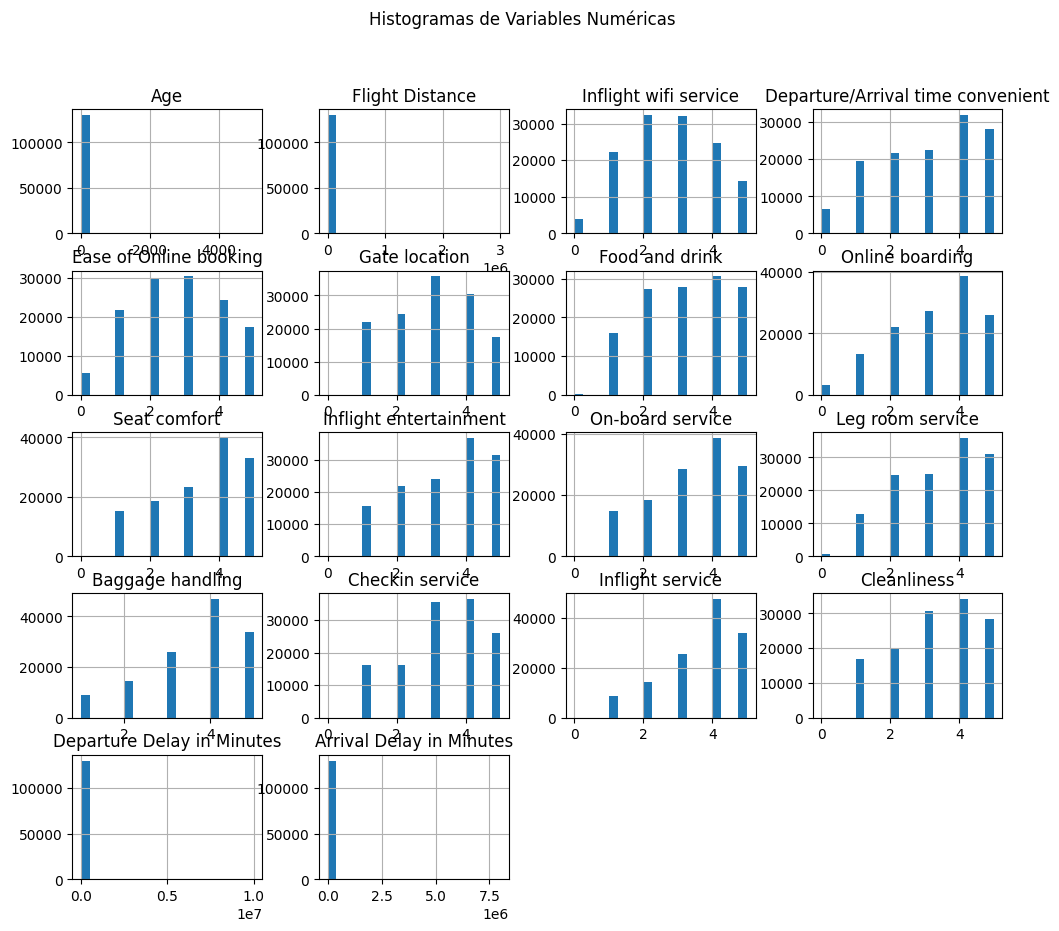

In [29]:
# Generamos histogramas para las variables numéricas
df_clean[cols_numericas].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

 Diagramas de Caja (Boxplots)

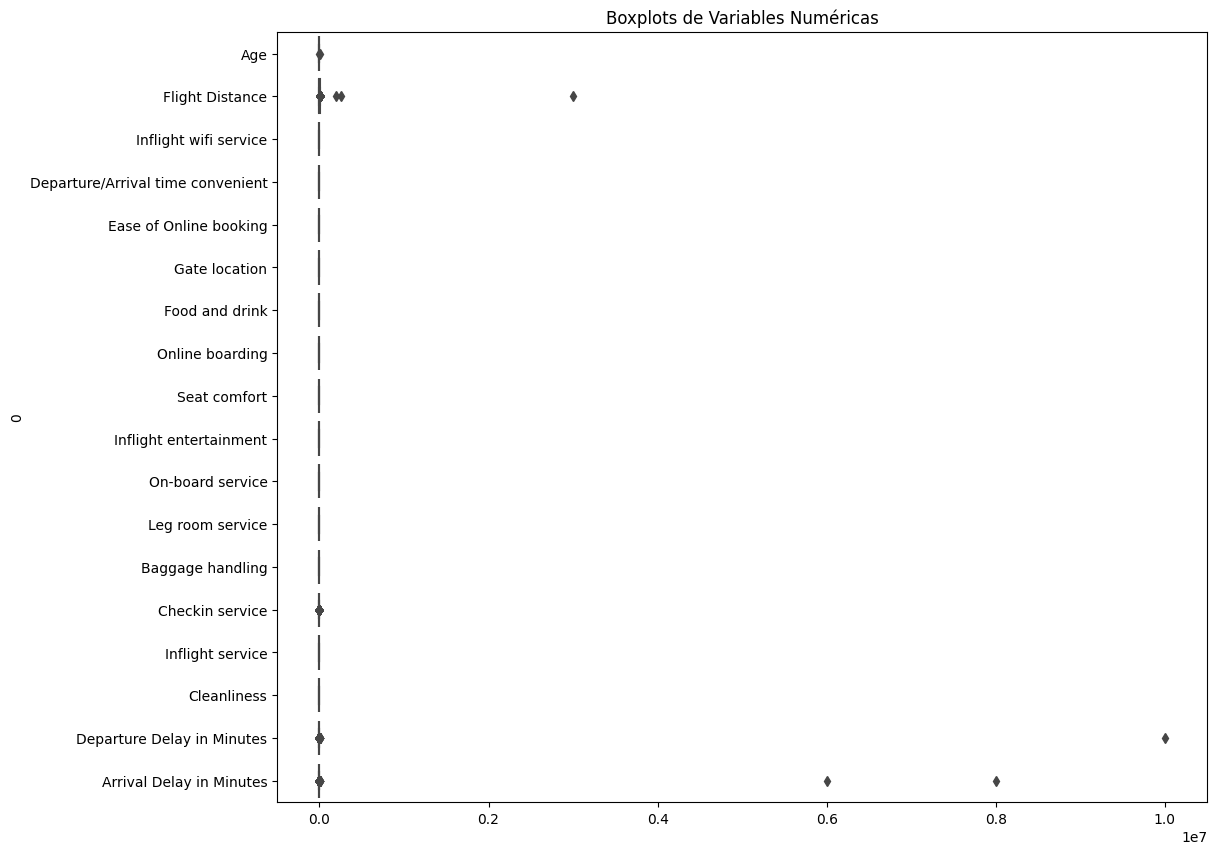

In [30]:
# Generamos boxplots para las variables numéricas
plt.figure(figsize=(12, 10))
sns.boxplot(data=df_clean[cols_numericas], orient='h')
plt.title('Boxplots de Variables Numéricas')
plt.show()

1. Diagrama de dispersión entre 'Seat comfort' (Comodidad del asiento) y 'Inflight service' (Servicio a bordo)

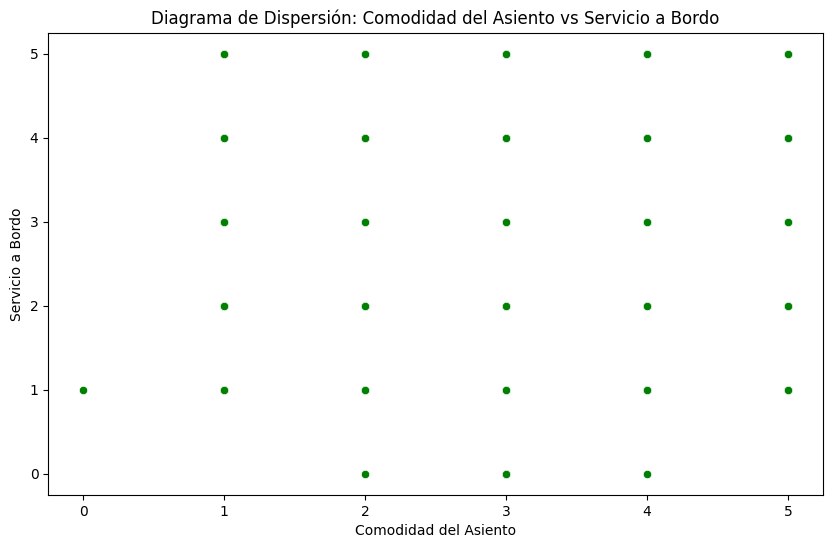

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seat comfort', y='Inflight service', data=df_clean, color='green')
plt.title('Diagrama de Dispersión: Comodidad del Asiento vs Servicio a Bordo')
plt.xlabel('Comodidad del Asiento')
plt.ylabel('Servicio a Bordo')
plt.show()

2. Diagrama de dispersión entre 'Food and drink' (Comida y bebida) y 'Inflight entertainment' (Entretenimiento a bordo)

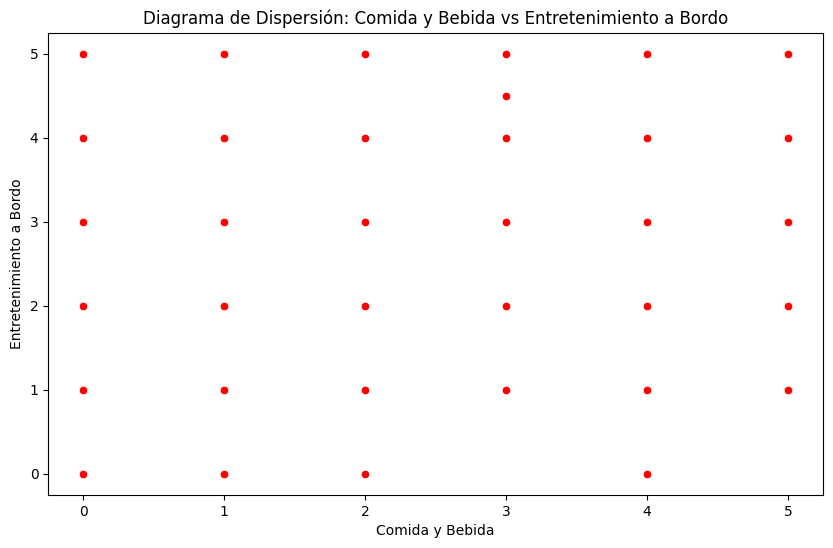

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Food and drink', y='Inflight entertainment', data=df_clean, color='red')
plt.title('Diagrama de Dispersión: Comida y Bebida vs Entretenimiento a Bordo')
plt.xlabel('Comida y Bebida')
plt.ylabel('Entretenimiento a Bordo')
plt.show()

3. Diagrama de dispersión entre 'Departure Delay in Minutes' (Retraso en la salida) y 'Arrival Delay in Minutes' (Retraso en la llegada)

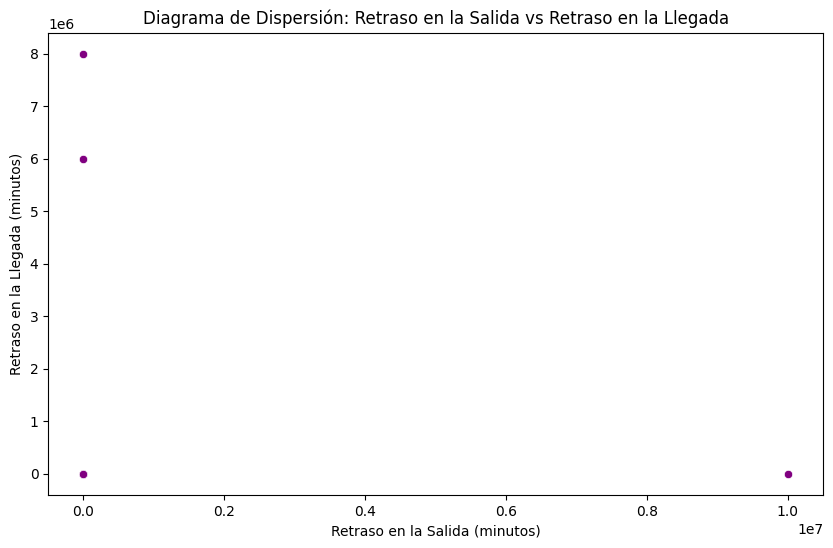

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', data=df_clean, color='purple')
plt.title('Diagrama de Dispersión: Retraso en la Salida vs Retraso en la Llegada')
plt.xlabel('Retraso en la Salida (minutos)')
plt.ylabel('Retraso en la Llegada (minutos)')
plt.show()

4. Diagrama de dispersión entre 'Ease of Online booking' (Facilidad de la reserva en línea) y 'Online boarding' (Embarque en línea)

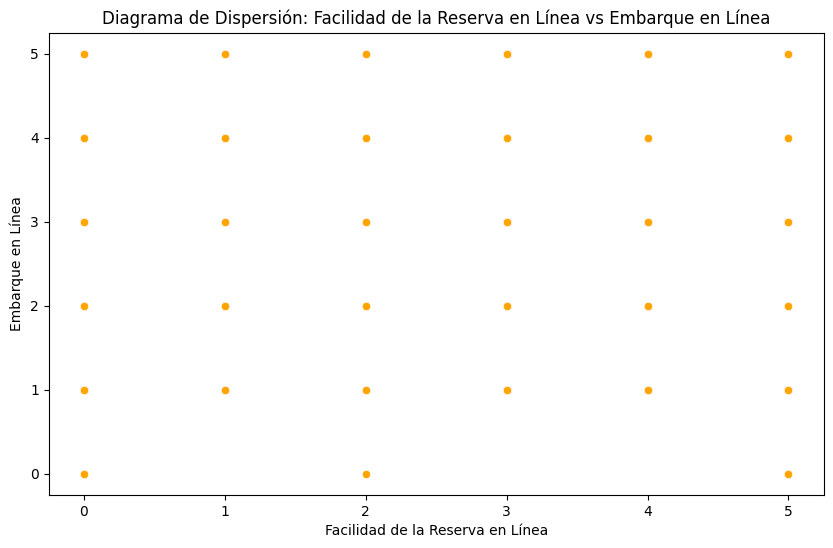

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ease of Online booking', y='Online boarding', data=df_clean, color='orange')
plt.title('Diagrama de Dispersión: Facilidad de la Reserva en Línea vs Embarque en Línea')
plt.xlabel('Facilidad de la Reserva en Línea')
plt.ylabel('Embarque en Línea')
plt.show()